# Laden der Daten   --- NOCH UNFERTIG!

In [62]:
# load vine dataset from scikit-learn

from sklearn.datasets import load_wine
import pandas as pd
# import train test split
from sklearn.model_selection import train_test_split
import torch

data = load_wine()
X = data.data

print(data.feature_names)

df = pd.DataFrame(X, columns=data.feature_names)
df.head()

y = df['alcohol']
df = df.drop("alcohol", axis=1)
df.head()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Scaling der Daten

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Split der daten und Konvertierung in Tensoren

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [65]:
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

# Modell bauen

In [78]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

    # Konstruktor
    def __init__(self):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        # Definition der Schichten

        # fc1 --> fully connected layer 1 von 12 auf 70 Neuronen
        # warum 12? --> 12 Features
        self.fc1 = torch.nn.Linear(12, 70)
        # fc2 --> fully connected layer 2 von 70 auf 120 Neuronen
        self.fc2 = torch.nn.Linear(70, 120)
        # fc3 --> fully connected layer 3 von 120 auf 30 Neuronen
        self.fc3 = torch.nn.Linear(120, 30)
        # fc4 --> fully connected layer 4 von 30 auf 1 Neuronen
        # Warum 1 Neuron? --> 1 Output, wir lesen da den Alkoholgehahlt aus
        self.fc4 = torch.nn.Linear(30, 1)

        # Batch Normalization
        # 70, 120, 30 sind die Anzahl der Neuronen in den Schichten
        self.bn1 = torch.nn.BatchNorm1d(70)
        self.bn2 = torch.nn.BatchNorm1d(120)
        self.bn3 = torch.nn.BatchNorm1d(30)

    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

# Training

In [79]:
def get_batch(x, y, batch_size):
    # z.B. range(0, 10, 3) --> 0, 3, 6, 9
    # range(start, stop, step)
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]



  0%|          | 0/100 [00:00<?, ?it/s]

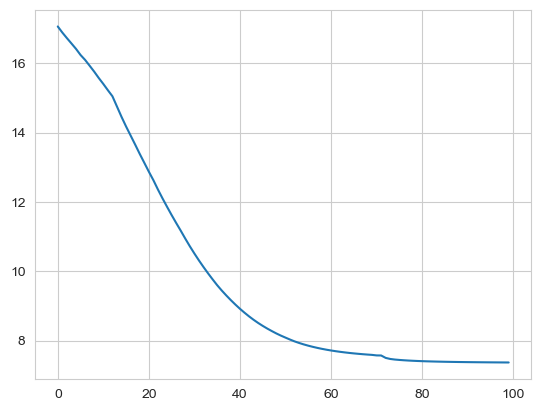

In [81]:
# eigenes Modell wird erstellt
model = MySimpleNN()
lr=0.0001
# trainiere immer mit 10 Datensätzen auf einmal
batch_size=10

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    with torch.no_grad():
        # Iteration über alle Parameter im Modell
        for param in model.parameters():
            # Backpropagation, d.h. die Veränderung der Gewichte in Abhängigkeit der Ableitung
            param -= lr * param.grad
        # Alle Gradients im Modell werden auf 0 gesetzt
        model.zero_grad()
    return loss.item()

losses=[]
# import tqdm notebook
from tqdm.notebook import tqdm
for epoch in tqdm(range(100)):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    losses.append(loss_sum/len(x_train))

#plot
import matplotlib.pyplot as plt
plt.plot(losses)

# Auswertung

In [82]:
errorSum=0
for xb, yb in get_batch(x_test, y_test, batch_size):
    y_hat=model(xb)
    for i in range(len(yb)):
        errorSum += abs(yb[i]-y_hat[i])

print("mean absolute error:" , errorSum/len(x_test))

mean absolute error: tensor([7.7258], grad_fn=<DivBackward0>)


In [83]:
y_hat=model(x_test[:10])
y = y_test[:10]
print("y_hat: ", y_hat, "y: ", y)

y_hat:  tensor([[ 0.0000],
        [ 0.0000],
        [10.8221],
        [ 8.7212],
        [10.9602],
        [ 7.6096],
        [ 1.8739],
        [11.9946],
        [ 5.0234],
        [11.9727]], grad_fn=<ReluBackward0>) y:  tensor([13.6400, 14.2100, 12.9300, 13.7300, 12.3700, 14.3000, 12.0000, 13.4000,
        11.6100, 13.3600])
